# 준비

In [6]:
!pip install --upgrade --user pip

In [7]:
!pip install opencv-python

     -------------------------------------- 35.6/35.6 MB 105.1 kB/s eta 0:00:00


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [19]:
# 폰트 설정
mpl.rc('font', family='NanumGothic')

# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

# 이미지 필터링

- 이미지 필터링
  - 여러 수식을 이용하여 이미지를 이루고 있는 픽셀 행렬을 다른 값으로 바꾸어 변형하는 것

## 임계처리

- 임계처리
  - 임계처리(thresholding)는 이미지 행렬에서 하나의 픽셀값을 사용자가 지정한 기준값(threshold)를 사용하여 이진화(binarization)하는 가장 단순한 필터다. OpenCV에서는 threshold라는 함수로 구현되어 있다. 인수는 다음과 같다.
  
  - threshold(scr, thresh, maxval, type)
    - src : 그레이 스케일 이미지
    - thresh : 기준값
    - maxval : 기준값을 넘었을 때 적용한 최대값
    - type : 임계 처리 유형
      - THRESH_BINARY : 기준값을 넘으면 최대값 아니면 0
      - THRESH_BINARY_INV : 기준값을 넘으면 0 아니면 최대값
      - THRESH_TRUBC : 기준값을 넘으면 기준값 아니면 최대값
      - THRESH_TOZERO : 기준값을 넘으면 원래 값 아니면 0
      - THRESH_TOZERO_INV : 기준값을 넘으면 0 아니면 원래값

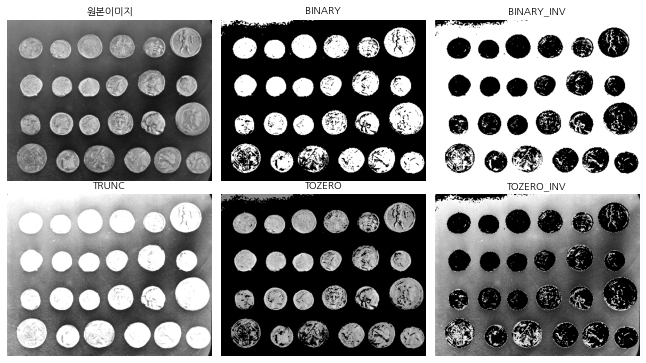

In [20]:
import cv2
from skimage.data import coins

img = coins()

maxval = 255
thresh = maxval / 2

_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

titles = ['원본이미지', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9, 5))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict={'fontsize': 10})
    plt.axis('off')

plt.tight_layout(pad=0.7)
plt.show()

## 적응임계처리

- 임계처리는 이미지 전체에 하나의 기준값을 적용
- 적응임계처리는 픽셀값을 이용하여 해당 영역에 적용한 기준값을 자체적으로 계산
- adaptiveThreshold 함수 사용

- adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)

  - src : 그레이스케일 이미지

  - maxValue – 기준값을 넘었을 때 적용할 값

  - adaptiveMethod : 영역 내에서 기준값을 계산하는 방법.

    - ADAPTIVE_THRESH_MEAN_C: 영역 내의 평균값에 C를 뺀 값을 기준값으로 사용

    - ADAPTIVE_THRESH_GAUSSIAN_C: 영역에 추후 설명할 가우시안 블러를 적용한 후 C를 뺀 값을 기준값으로 사용

  - thresholdType : 임계처리 유형

    - THRESH_BINARY

    - THRESH_BINARY_INV

  - blockSize : 임계처리를 적용할 영역의 크기

  - C : 평균이나 가중평균에서 차감할 값

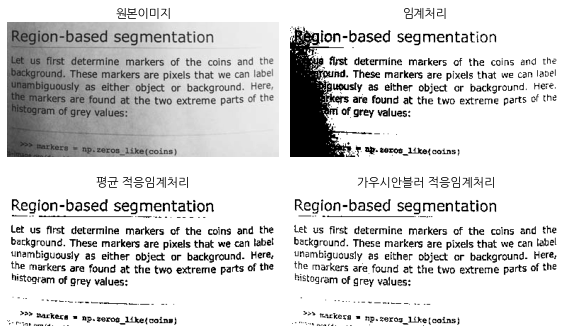

In [21]:
from skimage.data import page

img = page()

maxval = 255
thresh = 126
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

k = 15
C = 20

th2 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, k, C)
th3 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)

images = [img, th1, th2, th3]
titles = ['원본이미지', '임계처리', '평균 적응임계처리', '가우시안블러 적응임계처리']

plt.figure(figsize=(8, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## 윈도우 연산

- 윈도우 연산은 필터 또는 커널 또는 윈도우라고 하는 정방행렬을 정의하고 이 커널을 이동시키면서 같은 이미지 영역과 곱하여 그 결과값을 이미지의 해당 위치의 값으로 하는 새로운 이미지를 만드는 연산이다.

- 윈도우 연산
  - filter2D(src, ddepth, kernel[, dst[, ancor[, delta[, borderType]]]])
    - src : 이미지
    - ddepth : 이미지 깊이(자료형 크기). -1이면 입력과 동일
    - kernel : 커널 행렬

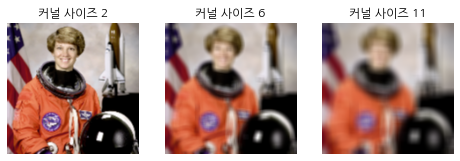

In [24]:
# 평균을 구하는 커널을 적용한 코드
import cv2
from skimage.data import astronaut

img = astronaut()
img = cv2.resize(img, dsize=(150, 150))

plt.figure(figsize=(8, 3))
for i, k in enumerate([2, 6, 11]):
    kernel = np.ones((k, k)) / k**2
    filtering = cv2.filter2D(img, -1, kernel)
    plt.subplot(1, 3, i + 1)
    plt.imshow(filtering)
    plt.title("커널 사이즈 {}".format(k))
    plt.axis("off")

plt.show()

## 블러
- 블러는 이미지 필터링을 사용하여 이미지를 흐리게 만드는 것이다. 노이즈를 제거하거나 경계선을 흐리게 만들기 위해 쓴다.
  - 평균 블러
  - 중앙값 블러
  - 가우시안 블러
  - 양방향 블러

### 평균 블러
- 균일한 값을 가지는 커널을 이용
- 커널 영역 내의 평균값으로 해당 픽셀을 대체한다.
- OpenCV의 blur 함수 이용

- blur(src, ksize)
  - src : 원본 이미지
  - ksize : 커널 크기

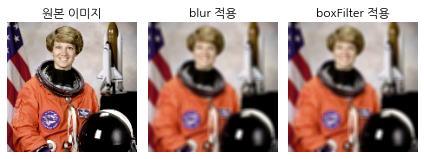

In [30]:
blur = cv2.blur(img, (5, 5))
boxfilter = cv2.boxFilter(img, -1, (5, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("원본 이미지")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(blur)
plt.title("blur 적용")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(boxfilter)
plt.title("boxFilter 적용")
plt.axis('off')

plt.tight_layout()
plt.show()

### 중앙값 블러
- medianBlur(src, ksize)
  - src : 원본 이미지
  - ksize : 커널 크기

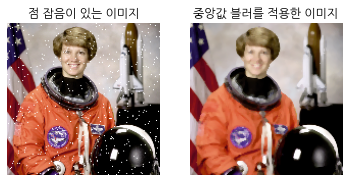

In [32]:
# 노이즈 적용
img_noise = img.copy()

np.random.seed(0)
N = 500
idx1 = np.random.randint(img.shape[0], size=N)
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1, idx2] = 255

# 중앙값 블러로 잡음 제거
img_denoise = cv2.medianBlur(img_noise, 3)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title('점 잡음이 있는 이미지')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title('중앙값 블러를 적용한 이미지')
plt.axis('off')
plt.show()


### 가우시안 블러
- 가우시안 함수 G를 커널로 사용하는 블러 처리 방법

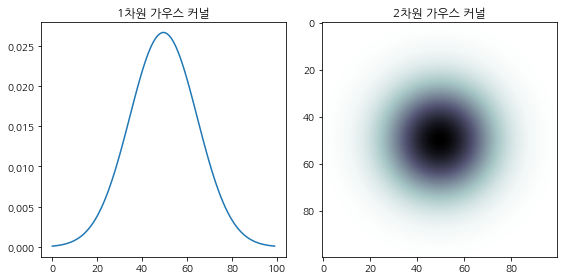

In [34]:
gauss1d = cv2.getGaussianKernel(100, 15)
gauss2d = gauss1d @ gauss1d.T

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.plot(gauss1d)
plt.grid(False)
plt.title('1차원 가우스 커널')

plt.subplot(122)
plt.imshow(gauss2d, cmap=mpl.cm.bone_r)
plt.grid(False)
plt.title('2차원 가우스 커널')

plt.tight_layout()
plt.show()

- GaussianBlur 함수로 구현
  - src : 원본 이미지
  - ksize : 커널 크기
  - sigmaX : 표준편차

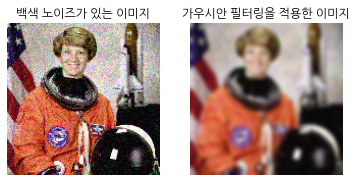

In [35]:
# whith noise
img_noise = np.clip((img / 255 + np.random.normal(scale=0.1, size=img.shape)) * 255, 0, 255).astype('uint8')

# 가우시안 블러로 잡음 제거
img_denoise = cv2.GaussianBlur(img_noise, (9, 9), 2)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title('백색 노이즈가 있는 이미지')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title('가우시안 필터링을 적용한 이미지')
plt.axis('off')

plt.show()

### 양방향 필터링
- 가우시안 필터링을 쓰면 이미지의 경계선이 흐려지는 문제가 발생할 수 있음
- 두 픽셀과의 거리 뿐 아니라 두 픽셀의 명암값 차이도 커널에 넣어서 가중치로 곱하는 필터링 방법
- 따라서 대상의 픽셀값 차이가 너무 크면 가중치가 0에 가까운 값이 되어 합쳐지지 않으므로 경계선이 잘 보존됨

- bilateralFilter(src, d, sigmaColor, sigmaSpace)
  - src : 원본 이미지
  - d : 커널 크기
  - sigmaColor : 색공간 표준편차. 값이 크면 색이 달라도 픽셀들이 영향을 미침
  - sigmaSpace : 거리공간 표준편차. 값이 크면 떨어져 있어도 서로 영향을 미침

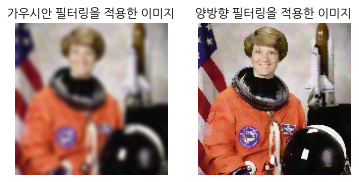

In [36]:
img_denoise1 = cv2.GaussianBlur(img_noise, (9, 9), 2)
img_denoise2 = cv2.bilateralFilter(img_noise, 9, 75, 75)

plt.subplot(121)
plt.imshow(img_denoise1)
plt.title('가우시안 필터링을 적용한 이미지')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_denoise2)
plt.title('양방향 필터링을 적용한 이미지')
plt.axis('off')

plt.show()

## 형태학적 변환
- 바이너리 이미지에서 같은 값을 가진 픽셀이 이웃하여 있을 때, 이를 형태학적 영역(morphologicla region)으로 생각할 수 있다. 이미지의 형태학적 변환은 이미지 필터링을 사용하여 영역을 변화시키는 방법이다

- 변환에 적용할 커널은 getStructuringElement 함수로 생성한다.

- getStructuringElement ( shape, ksize )
  - shape : 커널 모양
    - cv2.MORPH_RECT : 사각형
    - cv2.MORPH_ELLIPSE : 타원형
    - cv2.MORPH_CROSS : 십자형
  - ksize : 커널 크기

In [37]:
cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [39]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [40]:
cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### 침식 기법
- 침식 기법은 각 픽셀에 커널을 적용하여 커널 영역 내의 최솟값으로 해당 픽셀을 대체한다. 이진화된 이미지에서는 0인 영역이 증가한다.
- erode(src, kernel)
  - src : 원본 이미지
  - kernel : 커널

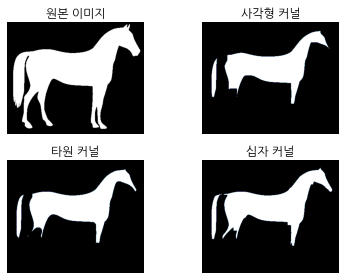

In [41]:
# 검은색이 0인 영역, 흰색이 1인 영역으로 이루어진 이미지를 침식 기법으로 확인
from skimage.data import horse

img = horse().astype('uint8')
img = np.ones(img.shape) - img

ksize = (20, 20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize)
title = ['사각형 커널', '타원 커널', '십자 커널']

plt.subplot(221)
plt.imshow(img, cmap= "gray")
plt.title('원본 이미지')
plt.axis('off')
for i in range(3):
    erosion = cv2.erode(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 팽창 ( Dilation )
- 침식과는 반대로 커널 영역 내의 최댓값으로 대체하는 방법

- dilate ( src, kernel )
  - src : 원본 이미지
  - kernel : 커널

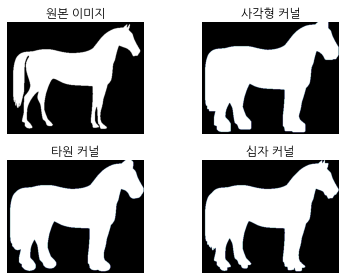

In [42]:
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('원본 이미지')
plt.axis('off')
for i in range(3):
    erosion = cv2.dilate(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 그레디언트, 오프닝, 클로징
- 그레디언트 : 팽창으로 확장시킨 영역에서 침식으로 축소시킨 영역을 빼서 윤곽선을 파악하는 방법

- 오프닝 : 침식을 적용시킨 뒤 팽창을 적용하면 영역이 점점 둥글게 되므로, 점 노이즈나 작은 물체, 돌기 등을 제거하는 데에 적합

- 클로징 : 팽창을 적용시킨 뒤 침식을 적용하면 영역이 붙어서 전체 윤곽을 파악하는 데에 적합

- morphologyEx(src, op, kernel)
  - src : 원본 이미지
  - op :
    - cv2.MORPH_OPEN : cv2.dilate(cv2.erode(image))
    - cv2.MORPH_CLOSE : cv2.erode(cv2.dilate(image))
    - cv2.MORPH_GRADIENT : cv2.dilate(image) - cv2.erode(image)
    - cv2.MORPH_TOPHAT : image - opening(image)
    - cv2.MORPH_BLACKHAT : image - closing(image)
  - kernel : 커널

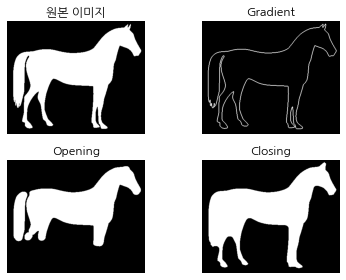

In [43]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
)

images = [img, gradient, opening, closing]
titles = ["원본 이미지", 'Gradient', 'Opening', 'Closing']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 이미지 링크 404 Error로 실습 진행 불가..

In [47]:
url = 'https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png'

In [46]:
!pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=15b3d9c25dc04d415a1a816d664a43dbae973fa1c6285ad1489992dd49611b80
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
